**Finding the ratings of science friction movies from data set consisting movies from 1898 to 2015** 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv('/home/krish/movilens/movies.csv', sep = ",")
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv('/home/krish/movilens/ratings.csv', sep = ",")
ratings.head()


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
del ratings['timestamp']

In [6]:
del ratings['userId']

In [7]:
ratings.shape

(20000263, 2)

Checking the data is clean or not

In [8]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [9]:
ratings.isnull().any()

movieId    False
rating     False
dtype: bool

In [10]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


To find the type  of years in which movies belong and convert to numeric if not in float64.

In [11]:
y = pd.to_numeric(movies['year'], errors='coerce')
y.dtype
#y.max()

dtype('float64')

In [12]:
g = movies.merge(ratings, on ='movieId', how = 'inner')
g.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4.5


In [13]:
g.shape

(20000263, 5)

In [14]:
g['sci-fi']= g['genres'].str.contains('Sci-Fi')
g.head()

,movieId,title,genres,year,rating,sci-fi
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4.0,False
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5.0,False
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4.0,False
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4.0,False
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,4.5,False


In [15]:

average_rating = g[['movieId','rating','sci-fi']].groupby('movieId',as_index=False).mean()

In [16]:
average_rating.head()

,movieId,rating,sci-fi
0,1,3.921240,False
1,2,3.211977,False
2,3,3.151040,False
3,4,2.861393,False
4,5,3.064592,False


In [18]:
science = g['sci-fi'] == True
t = g[science]

In [19]:
average_rating = t[['movieId','rating','sci-fi']].groupby('movieId',as_index=False).mean()
average_rating.head()

,movieId,rating,sci-fi
0,24,3.199849,True
1,29,3.952230,True
2,32,3.898055,True
3,66,2.144243,True
4,76,3.009024,True


In [20]:
a = average_rating.merge(movies, on='movieId', how='inner')
a.head()

,movieId,rating,sci-fi,title,genres,year
0,24,3.199849,True,Powder (1995),Drama|Sci-Fi,1995
1,29,3.952230,True,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,1995
2,32,3.898055,True,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,1995
3,66,2.144243,True,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller,1996
4,76,3.009024,True,Screamers (1995),Action|Sci-Fi|Thriller,1995


In [21]:
del a['title']

In [22]:
del a['genres']

In [23]:
a.tail()

,movieId,rating,sci-fi,year
1715,130842,3.333333,True,2015
1716,131050,5.000000,True,2009
1717,131054,2.000000,True,2005
1718,131062,0.500000,True,2008
1719,131170,3.500000,True,2015


In [24]:
a ['year']= pd.to_numeric(a['year'], errors='coerce')
a.head()

,movieId,rating,sci-fi,year
0,24,3.199849,True,1995.0
1,29,3.952230,True,1995.0
2,32,3.898055,True,1995.0
3,66,2.144243,True,1996.0
4,76,3.009024,True,1995.0


In [25]:
a['rating'] = pd.to_numeric(a['rating'], errors='coerce')
a.head()

,movieId,rating,sci-fi,year
0,24,3.199849,True,1995.0
1,29,3.952230,True,1995.0
2,32,3.898055,True,1995.0
3,66,2.144243,True,1996.0
4,76,3.009024,True,1995.0


In [26]:
g= a[['rating','year']].groupby('year',as_index=False).mean()
g.head()

,year,rating
0,1898.0,2.500000
1,1902.0,3.738189
2,1910.0,2.983333
3,1916.0,3.257143
4,1920.0,3.000000


Exact average value of ratings to science friction movies is below:

In [27]:
g['rating'].mean()

2.8993149918407903

In [28]:
g['year'].max()
#g['year'].min()

2015.0

The below line plot shows changes in ratings according to year.

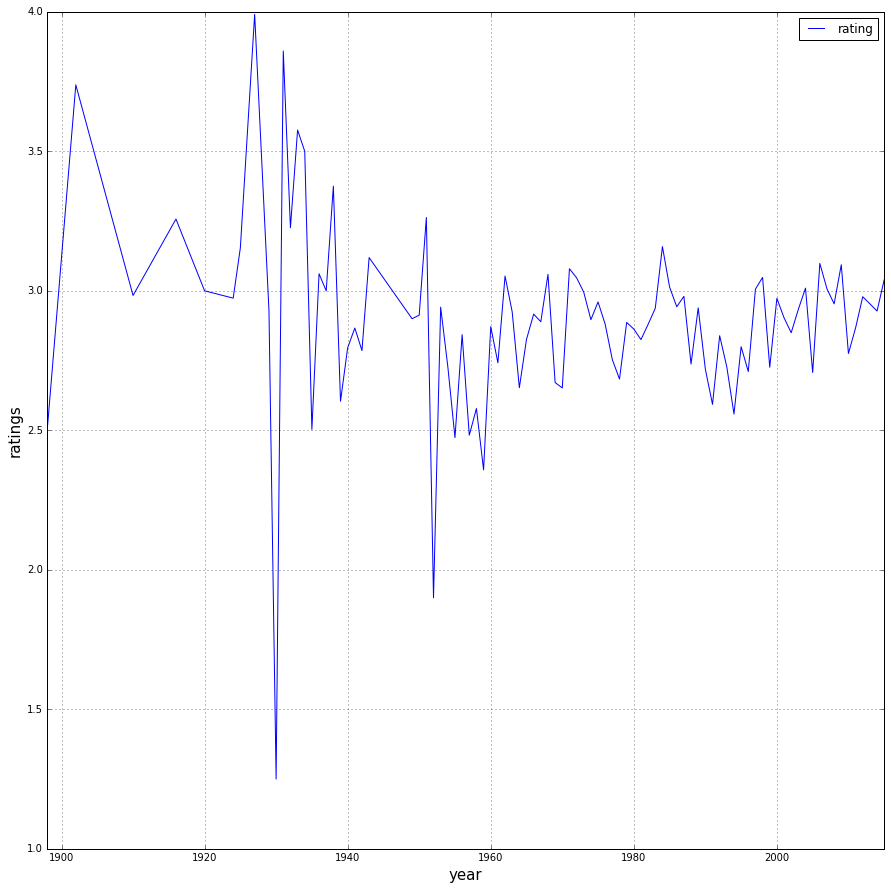

In [31]:
g[:].plot(x='year', y='rating', figsize=(15,15), grid=True)
plt.xlabel('year',fontsize ='15')
plt.ylabel('ratings',fontsize = '15')

This below histogram shows most science friction movies has ratings around 3.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbb9afaf10>]], dtype=object)

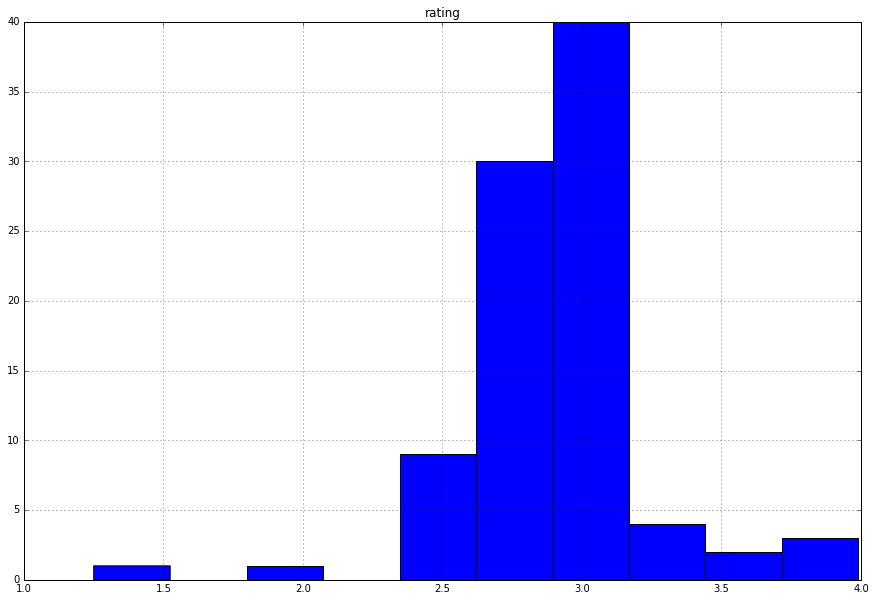

In [30]:
%matplotlib inline

g.hist(column='rating', figsize=(15,10))